### Confidence Interval - Difference In Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` Bootstraping sample of sample data for 10,000 iterations and computing the difference in the average heights for coffee and non-coffee drinkers.

In [2]:
diff=[]
for _ in range(10000):
    boot_sample=sample_data.sample(200, replace=True)
    mean_coff=boot_sample[boot_sample['drinks_coffee']==True]['height'].mean()
    mean_noncoff=boot_sample[boot_sample['drinks_coffee']==False]['height'].mean()
    diff.append(mean_coff-mean_noncoff)

In [13]:
low, upper = np.percentile(diff,0.5),np.percentile(diff,99.5)

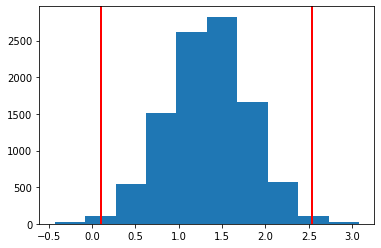

In [18]:
plt.hist(diff)
plt.axvline(x=low, color="r", linewidth=2)
plt.axvline(x=upper, color="r", linewidth=2);

`2.` Bootstraping sample of sample data and computing the difference in the average heights for those older than 21 and those younger than 21.

In [19]:
diffs_age = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_mean = bootsamp[bootsamp['age'] == '<21']['height'].mean()
    over21_mean = bootsamp[bootsamp['age'] != '<21']['height'].mean()
    diffs_age.append(over21_mean - under21_mean)

In [20]:
np.percentile(diffs_age, 0.5), np.percentile(diffs_age, 99.5)
# statistical evidence that over21 are on average taller

(3.365274945255409, 5.093245067066094)

`3.` Bootstraping sample of data and computing the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.

In [21]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.0579898617195473, 2.593155794067925)

`4.` Bootstraping sample of data and computing the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals over 21 years old.

In [22]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    over21_coff_mean = bootsamp.query("age != '<21' and drinks_coffee == True")['height'].mean()
    over21_nocoff_mean = bootsamp.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_over21.append(over21_nocoff_mean - over21_coff_mean)
    
np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)
# For the over21 group, we have evidence that on average the non-coffee drinkers are taller

(1.827895397088422, 4.402632965477477)

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  
But, when combined, we saw that on average coffee drinkers were on average taller.  This is **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers. So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.